In [ ]:
!pip install yellowbrick
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
sns.set_theme()

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
Races = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/3. Linear Models/ScotsRaces.dat", sep='\s+|\s+')
Races.head(10)

<ipython-input-2-d37b101f7d86>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Races = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/3. Linear Models/ScotsRaces.dat", sep='\s+|\s+')


,race,distance,climb,timeM,timeW
0,AnTeallach,10.6,1.062,74.68,89.72
1,ArrocharAlps,25.0,2.400,187.32,222.03
2,BaddinsgillRound,16.4,0.650,87.18,102.48
3,BeinnLee,10.2,0.260,41.58,52.52
4,BeinnRatha,12.0,0.240,47.75,58.78
5,BeinnResipol,12.0,0.845,68.20,81.38
6,BenGullipen,13.5,0.350,49.97,56.70
7,BenLedi,10.0,0.750,50.08,63.55
8,BenLomond,12.0,0.970,62.27,71.95
9,BenNevis,14.0,1.340,85.57,103.02


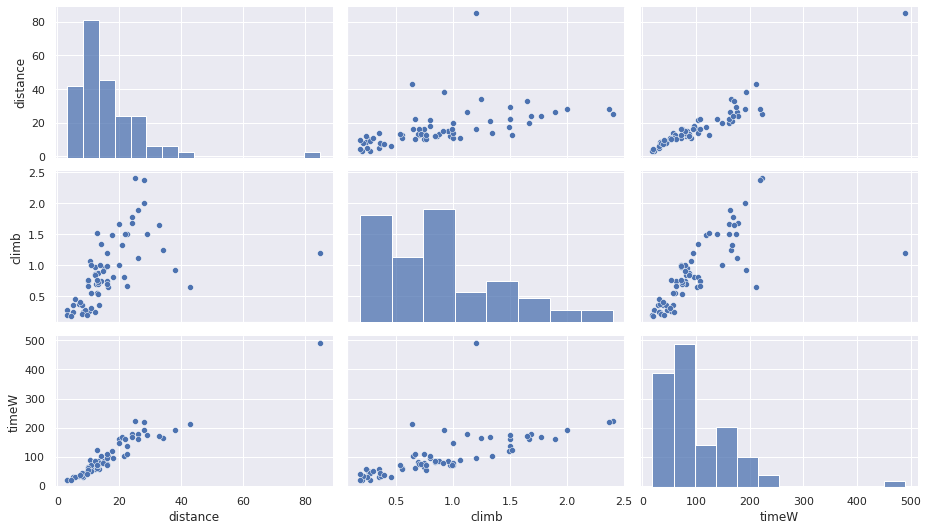

In [ ]:
Races2 = Races.drop(['timeM'], axis=1)
sns.pairplot(Races2, aspect=1.75)

In [ ]:
fitd = smf.ols(formula='timeW ~ distance', data=Races).fit()
print(fitd.summary())

                            OLS Regression Results                            
Dep. Variable:                  timeW   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     693.3
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.00e-36
Time:                        07:40:42   Log-Likelihood:                -304.30
No. Observations:                  68   AIC:                             612.6
Df Residuals:                      66   BIC:                             617.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1076      4.537      0.685      0.4

In [ ]:
Races2.corr()

,distance,climb,timeW
distance,1.000000,0.514471,0.955549
climb,0.514471,1.000000,0.685292
timeW,0.955549,0.685292,1.000000


In [ ]:
Races3 = Races2.loc[Races2.index != 40]
Races3.corr()

,distance,climb,timeW
distance,1.000000,0.661714,0.920539
climb,0.661714,1.000000,0.851599
timeW,0.920539,0.851599,1.000000


In [ ]:
fitdc = smf.ols(formula='timeW ~ distance + climb', data=Races).fit()
print(fitdc.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  timeW   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     872.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.10e-47
Time:                        07:40:42   Log-Likelihood:                -274.24
No. Observations:                  68   AIC:                             554.5
Df Residuals:                      65   BIC:                             561.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5997      3.468     -4.210      0.0

In [ ]:
Florida = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/3. Linear Models/Florida.dat", sep='\s+|\s+')
Florida.head(3)

<ipython-input-8-a57d219fcfad>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Florida = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/3. Linear Models/Florida.dat", sep='\s+|\s+')


,County,Crime,Income,HS,Urban
0,ALACHUA,104,22.1,82.7,73.2
1,BAKER,20,25.8,64.1,21.5
2,BAY,64,24.7,74.7,85.0


In [ ]:
Florida.corr()

,Crime,Income,HS,Urban
Crime,1.000000,0.433750,0.466912,0.677368
Income,0.433750,1.000000,0.792621,0.730698
HS,0.466912,0.792621,1.000000,0.790719
Urban,0.677368,0.730698,0.790719,1.000000


In [ ]:
fitFlorida = smf.ols(formula='Crime ~ HS', data=Florida).fit()
print(fitFlorida.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     18.12
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           6.81e-05
Time:                        07:40:43   Log-Likelihood:                -310.05
No. Observations:                  67   AIC:                             624.1
Df Residuals:                      65   BIC:                             628.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.8569     24.451     -2.080      0.0

In [ ]:
fitFlorida2 = smf.ols(formula='Crime ~ HS + Urban', data=Florida).fit()
print(fitFlorida2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     28.54
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.38e-09
Time:                        07:40:43   Log-Likelihood:                -296.93
No. Observations:                  67   AIC:                             599.9
Df Residuals:                      64   BIC:                             606.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.1181     28.365      2.084      0.0

In [ ]:
fitinter = smf.ols(formula='timeW ~ distance + climb + distance:climb', data=Races).fit()
print(fitinter.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  timeW   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     598.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           9.45e-47
Time:                        07:40:43   Log-Likelihood:                -272.79
No. Observations:                  68   AIC:                             553.6
Df Residuals:                      64   BIC:                             562.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.0162      6.683     -0.

In [ ]:
fitinter2 = smf.ols(formula='timeW ~ -1 + distance + climb + distance:climb', data=Races).fit()
print(fitinter2.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                  timeW   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1822.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):                    1.22e-62
Time:                        07:40:43   Log-Likelihood:                         -273.09
No. Observations:                  68   AIC:                                      552.2
Df Residuals:                      65   BIC:                                      558.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Text(0, 0.5, 'frequencies')

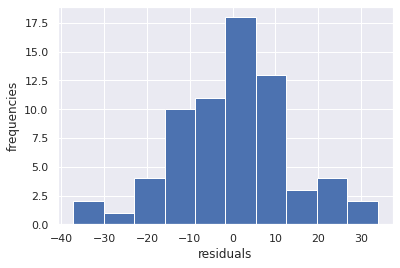

In [ ]:
fitdc = smf.ols(formula = 'timeW ~ distance + climb', data = Races).fit()
fitted = fitdc.predict()
residuals = fitdc.resid
plt.hist(residuals, density=False)
plt.xlabel('residuals'); plt.ylabel('frequencies')

Text(0, 0.5, 'Residuals')

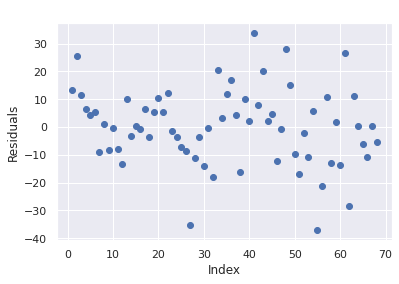

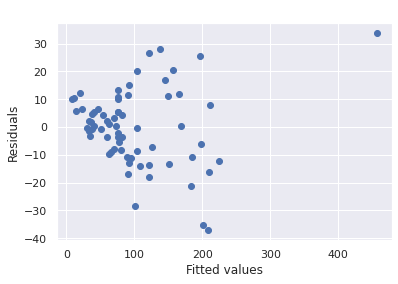

In [ ]:
index =  list(range(1, len(residuals) + 1))
plt.scatter(index, residuals)
plt.title(' '); plt.xlabel('Index'); plt.ylabel('Residuals')
plt.figure()
plt.scatter(fitted, residuals)
plt.title(' '); plt.xlabel('Fitted values'); plt.ylabel('Residuals')

eval_env: 1
eval_env: 1


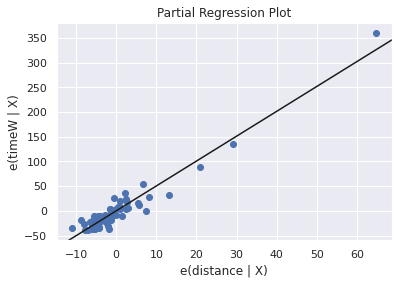

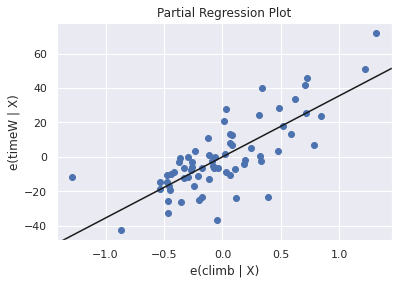

In [ ]:
fig_dis = sm.graphics.plot_partregress('timeW','distance', ['climb'], data = Races, obs_labels = False)
fig_climb = sm.graphics.plot_partregress('timeW','climb', ['distance'], data = Races, obs_labels = False)

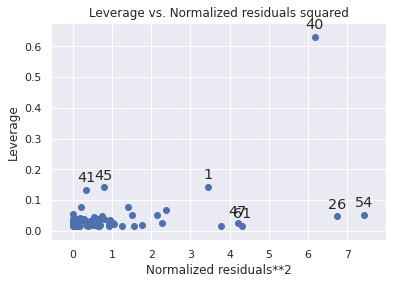

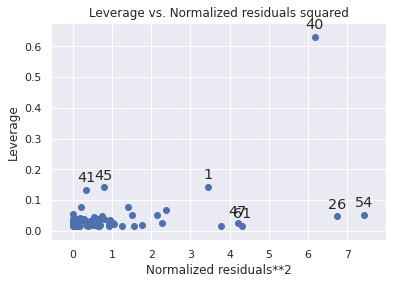

In [ ]:
sm.graphics.plot_leverage_resid2(fitdc)

In [ ]:
influence = fitdc.get_influence()
everage = influence.hat_matrix_diag   # hat values
cooks_d = influence.cooks_distance 
cooks_df = pd.DataFrame(cooks_d,index=['CooksDist','p-value'])
cooks_df = pd.DataFrame.transpose(cooks_df)
cooks_df.sort_values(by=['CooksDist']).tail(3)

,CooksDist,p-value
54,0.139240,0.936172
1,0.216293,0.884759
40,9.068277,0.000042


CooksDistance(ax=<AxesSubplot:>)

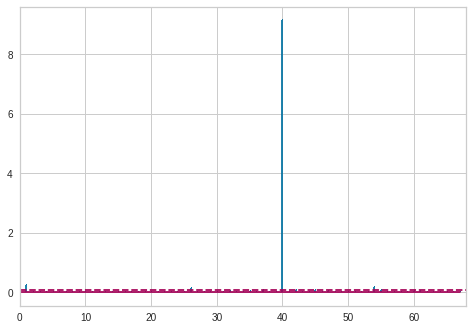

In [ ]:
from yellowbrick.regressor import CooksDistance
X = Races.drop(['race', 'timeM', 'timeW'], axis=1)
y = Races['timeW']
visualizer = CooksDistance()
visualizer.fit(X, y)

CooksDistance(ax=<AxesSubplot:>)

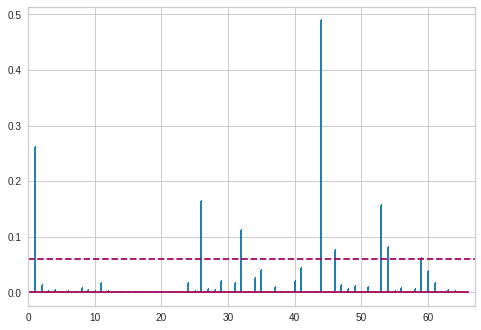

In [ ]:
X1 = X.loc[X.index != 40]
y1 = y.loc[y.index != 40]
visualizer = CooksDistance()
visualizer.fit(X1, y1)

In [ ]:
Races = Races.loc[Races.index != 40]
fitdc = smf.ols(formula='timeW ~ distance + climb', data=Races).fit()
print(fitdc.summary()) 
print('The conditional variance of Y in {:.2f}'.format(fitdc.scale)) # conditional variance of Y
print('The marginal variance of Y in {:.2f}'.format(Races['timeW'].var())) # marginal variance of Y
print('R-squared is {:.4f}'.format(fitdc.rsquared))
print('Adjusted R-squared is {:.4f}'.format(1- fitdc.scale/Races['timeW'].var()))

                            OLS Regression Results                            
Dep. Variable:                  timeW   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     634.3
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           6.41e-43
Time:                        07:40:46   Log-Likelihood:                -261.27
No. Observations:                  67   AIC:                             528.5
Df Residuals:                      64   BIC:                             535.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.9315      3.281     -2.723      0.0

In [ ]:
Mental = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/3. Linear Models/Mental.dat", sep='\s+|\s+')
Mental.corr()

<ipython-input-22-c8d18c269aa9>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Mental = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/3. Linear Models/Mental.dat", sep='\s+|\s+')


,impair,life,ses
impair,1.000000,0.372221,-0.398568
life,0.372221,1.000000,0.123337
ses,-0.398568,0.123337,1.000000


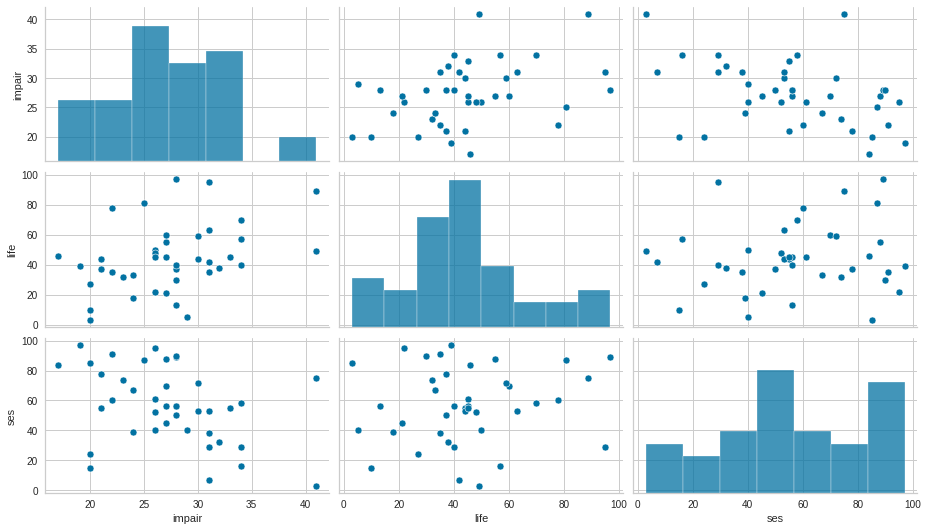

In [ ]:
sns.pairplot(Mental, aspect=1.75)

In [ ]:
fit = smf.ols(formula='impair ~ life + ses', data=Mental).fit()
print(fit.summary())   

                            OLS Regression Results                            
Dep. Variable:                 impair   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     9.495
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           0.000470
Time:                        07:40:51   Log-Likelihood:                -115.86
No. Observations:                  40   AIC:                             237.7
Df Residuals:                      37   BIC:                             242.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.2298      2.174     12.984      0.0

In [ ]:
Races = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/3. Linear Models/ScotsRaces.dat", sep='\s+|\s+')

<ipython-input-25-de627511a55f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Races = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/3. Linear Models/ScotsRaces.dat", sep='\s+|\s+')


In [ ]:
fitclimbW = smf.ols(formula='climb ~ timeW', data=Races).fit()
print(fitclimbW.summary())

                            OLS Regression Results                            
Dep. Variable:                  climb   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     58.44
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.15e-10
Time:                        07:40:51   Log-Likelihood:                -32.227
No. Observations:                  68   AIC:                             68.45
Df Residuals:                      66   BIC:                             72.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3760      0.082      4.572      0.0

In [ ]:
fitclimbWM = smf.ols(formula='climb ~ timeW + timeM', data=Races).fit()
print(fitclimbWM.summary())

                            OLS Regression Results                            
Dep. Variable:                  climb   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     30.35
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           4.91e-10
Time:                        07:40:51   Log-Likelihood:                -31.366
No. Observations:                  68   AIC:                             68.73
Df Residuals:                      65   BIC:                             75.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3455      0.085      4.057      0.0

In [ ]:
fitWM = smf.ols(formula='timeW ~ timeM', data=Races).fit()
print(fitWM.summary())
VIT = 1.0 / (1.0 - fitWM.rsquared)
print('VIT for the womens record time is {:.2f}'.format(VIT))

                            OLS Regression Results                            
Dep. Variable:                  timeW   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     7947.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.63e-70
Time:                        07:40:51   Log-Likelihood:                -224.18
No. Observations:                  68   AIC:                             452.4
Df Residuals:                      66   BIC:                             456.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0573      1.350      3.004      0.0

In [ ]:
newdata = pd.DataFrame({'life':[44.42], 'ses':[56.60]})
predictions = fit.get_prediction(newdata)
pd.options.display.width = 0 
predictions.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,27.299484,0.720436,25.839742,28.759226,17.952574,36.646394


In [ ]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(fit, alpha = 0.05)
fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_up = data[:, 4:6].T  # CI
predict_ci_low, predict_ci_up = data[:, 6:8].T            # PI

(40,)


<ipython-input-31-78f32c9c3ae3>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(Mental['life'], predict_ci_low, 'r--', lw=2, c='k')
<ipython-input-31-78f32c9c3ae3>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(Mental['life'], predict_ci_up, 'r--', lw=2, c='k')


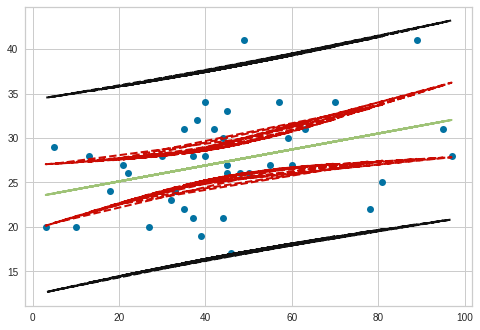

In [ ]:
fitlife = smf.ols(formula='impair ~ life', data=Mental).fit()
st, data, ss2 = summary_table(fitlife, alpha = 0.05)
fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_up = data[:, 4:6].T  # CI
predict_ci_low, predict_ci_up = data[:, 6:8].T            # PI
print(predict_ci_low.shape)

x = np.linspace(0, 100, 40)
plt.plot(Mental['life'], Mental['impair'], 'o')
plt.plot(Mental['life'], fittedvalues, '-', lw=2)
plt.plot(Mental['life'], predict_ci_low, 'r--', lw=2, c='k')
plt.plot(Mental['life'], predict_ci_up, 'r--', lw=2, c='k')
plt.plot(Mental['life'], predict_mean_ci_low, 'r--', lw=2)
plt.plot(Mental['life'], predict_mean_ci_up, 'r--', lw=2)
plt.show()

In [ ]:
Income = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/3. Linear Models/Income.dat", sep='\s+|\s+')
print(Income.head(3))
fit = smf.ols(formula = 'income ~ C(race)', data=Income).fit()
print(fit.summary()) 

<ipython-input-32-9587d89338a8>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Income = pd.read_csv("/content/drive/My Drive/ICT - AI/Study Units/ARI5102 - Data Analysis Techniques/3. Linear Models/Income.dat", sep='\s+|\s+')


   income  education race
0      16         10    B
1      18          7    B
2      26          9    B
                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     4.244
Date:                Wed, 15 Mar 2023   Prob (F-statistic):             0.0178
Time:                        07:40:52   Log-Likelihood:                -351.13
No. Observations:                  80   AIC:                             708.3
Df Residuals:                      77   BIC:                             715.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
sm.stats.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(race),2.0,3352.47,1676.235000,4.244403,0.01784
Residual,77.0,30409.48,394.928312,NaN,NaN


In [ ]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(Income['income'], Income['race'])
post_hoc_res = comp.tukeyhsd(alpha=0.05)
print(post_hoc_res.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     B      H     3.25 0.8959 -14.1308 20.6308  False
     B      W    14.73 0.0312   1.0886 28.3714   True
     H      W    11.48 0.1426  -2.8806 25.8406  False
-----------------------------------------------------


In [43]:
fitinter = smf.ols(formula='income ~ C(race) + education + C(race):education', data=Income).fit()
print(fitinter.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     13.80
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.62e-09
Time:                        08:42:19   Log-Likelihood:                -328.97
No. Observations:                  80   AIC:                             669.9
Df Residuals:                      74   BIC:                             684.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -6

In [46]:
fit2 = smf.ols(formula='income ~ C(race) + education ', data=Income).fit()
sm.stats.anova_lm(fit2, typ=2)  

,sum_sq,df,F,PR(>F)
C(race),1460.583947,2.0,3.055573,5.292198e-02
education,12245.231928,1.0,51.234580,4.422192e-10
Residual,18164.248072,76.0,NaN,NaN
